In [1]:
import numpy as np
import ice_funcs as icef
import snowflake_plot as snp

import matplotlib.pyplot as plt



# NOTES
***Il est possible que la forme fonctionnelle sexy soit la double kink...***

Serious potential appearing with b=0.2, alpha_max=3....

## Influence de la forme fonctionnelle quand b=10
---> pas mal rien!




# SERIOUS OBSERVATIONS

- Small seed cystal leads to strange non complex patterns (numerical anisotropy???)
- Explain dentricity
- Invent measure of dentricity (perimeter/volume???)
- THE KINK FACTOR MUST BE EXPLORED MORE and where it needs to go...
- param alpha max change pas grand chose.... à étudier/expliquer


In [22]:
L = 501 # Length of simulation zone

# initialising snowflake class
SnowflakeSim = icef.SnowflakeSimulation(L)

# defining physical parameters
""" GAS KINETICS """
SnowflakeSim.PhysicsU.X_0 = 1
SnowflakeSim.PhysicsU.v_kin = 1 # not sure this does much except time

""" ATTACHMENT """
SnowflakeSim.PhysicsU.max_alpha = 3
SnowflakeSim.PhysicsU.b = 10

""" GEOMETRY CONTROL """
SnowflakeSim.PhysicsU.D_x = 1


print("Starting simulation")

final_ice_map = SnowflakeSim.run_simulation(20000, initial_seed_half_width=50)

Starting simulation
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000
Iteration 2100
Iteration 2200
Iteration 2300
Iteration 2400
Iteration 2500
Iteration 2600
Iteration 2700
Iteration 2800
Iteration 2900
Iteration 3000
Iteration 3100
Iteration 3200
Iteration 3300
Iteration 3400
Iteration 3500
Iteration 3600
Iteration 3700
Iteration 3800
Iteration 3900
Iteration 4000
Iteration 4100
Iteration 4200
Iteration 4300
Iteration 4400
Iteration 4500
Iteration 4600
Iteration 4700
Iteration 4800
Iteration 4900
Iteration 5000
Iteration 5100
Iteration 5200
Iteration 5300
Iteration 5400
Iteration 5500
Iteration 5600
Iteration 5700
Iteration 5800
Iteration 5900
Iteration 6000
Iteration 6100
Iteration 6200
Iteration 6300
Iteration 6400
Iteration 6500
It

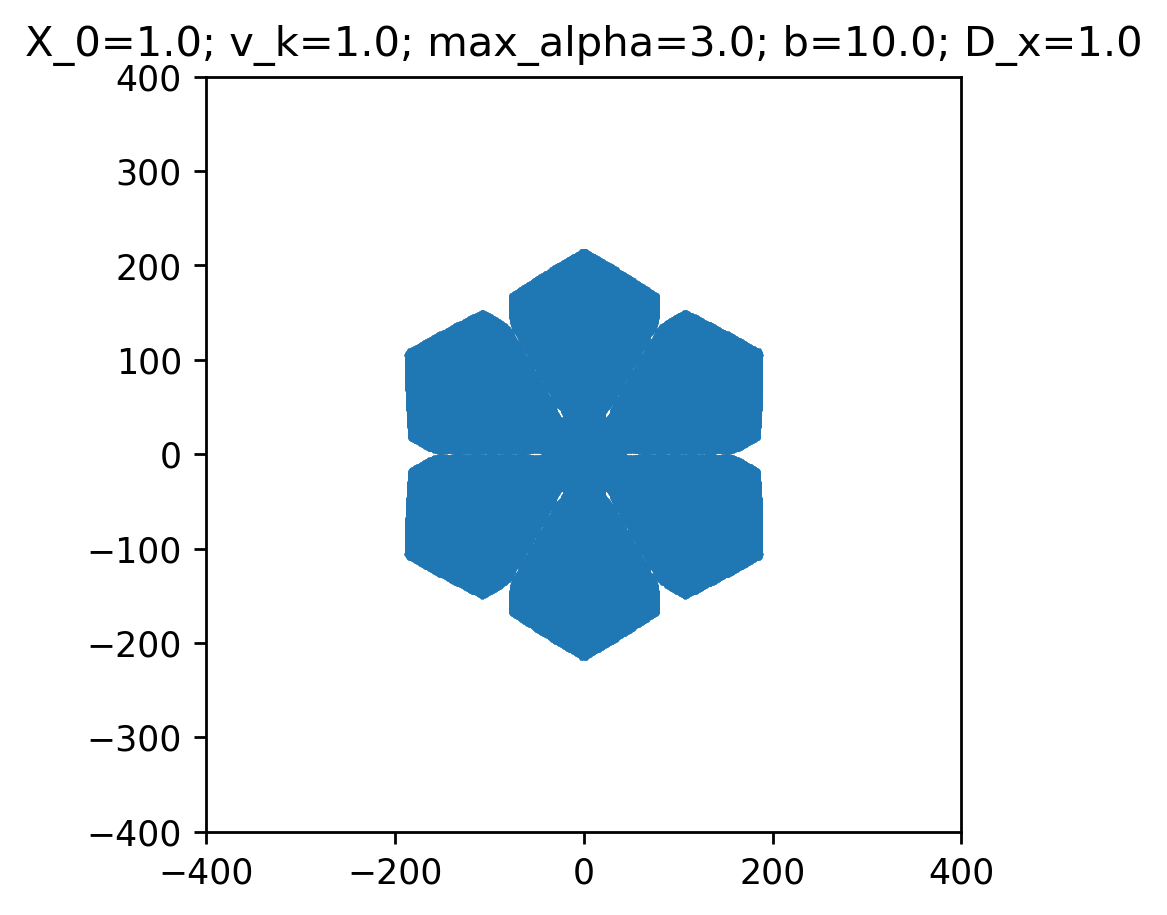

In [23]:
demi_largeur = 400

params = {"figure.dpi":250}
plt.rcParams.update(params)

converter = snp.CoordsFromIceMap(L)
R = converter.convert_ice_map_to_all_coords(final_ice_map)



plt.figure()

plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.title(f"X_0={SnowflakeSim.PhysicsU.X_0}; v_k={SnowflakeSim.PhysicsU.v_kin}; max_alpha={SnowflakeSim.PhysicsU.max_alpha}; b={SnowflakeSim.PhysicsU.b}; D_x={SnowflakeSim.PhysicsU.D_x}") ###################################### SO ON SO FORTH

plt.show()